Project 3: Text analysis of political social media
======

- By Jacob Eisenstein
- For CS 8803-CSS, September 2017



For this project, we'll use scikit learn. Install it with the line below.

In [1]:
from __future__ import print_function

In [2]:
! pip3 install --user sklearn

In [3]:
import codecs #unicode compliance -- maybe not necessary in python 3?
import glob #wildcard filenames

# Data processing

First let's read the data. Here's some hacky code by yours truly.

In [4]:
# some hacky text formatting by yours truly
linebreak = '-----==----==---==-----'
subreddits = dict()
for subreddit_file in sorted(glob.glob('*.txt')):
    print(subreddit_file)
    subreddit = subreddit_file[:-4]
    comments = []
    #with codecs.open('.'.join([subreddit,'txt']),'r','utf-8-sig') as fin:
    with codecs.open(subreddit_file,'r','utf-8-sig') as fin:
        comment = ''        
        for line in fin:
            b
                #print line
                #comment += line.decode('utf-8')
                comment += line
            else:
                comments.append(comment)
                comment = ''
    subreddits[subreddit] = comments

Anarchism.txt
Conservative.txt
Libertarian.txt
Progressive.txt
Socialism.txt


`subreddits` is a dict from labels to lists of text comments

In [5]:
subreddits.keys()

dict_keys(['Anarchism', 'Conservative', 'Libertarian', 'Progressive', 'Socialism'])

In [6]:
for comment in subreddits['Anarchism'][:3]:
    print(comment)

Im not the biggest fan of non violent tactics and im highly critical of it but seeing 70% of folks walkout while that radscum was speaking really made me happy.

"Attendees were required to check their bags before entering, and security and police forces were standing by throughout all parts of the EMU Ballroom. Regardless of strong police preparation in case of a violent of rowdy demonstration, the event remained calm for all but for a quiet walkout during Keith’s performance and a rally in the EMU amphitheater."

I would much prefer an open discussion on gender theory and analysis.  



**Your turn** take a look at the top three comments in one of the other subreddits

In [7]:
# your code here
for comment in subreddits['Libertarian'][:3]:
    print(comment)

Hi Steve, do you think we're on the cusp of having a viable third party in the form of the LP? What makes you think so? I think there's a growing element of the electorate who is either looking for an alternative or beginning to see the advantages of libertarian philosophy. How do we maintain this momentum, attract financial backing, etc? Your thoughts? Thank you!

Here is the summary (with some assumptions made in my part; if my assumptions are correct, I have lost all faith in government)...

• Man goes through security and is stopped by two TSA supervisors

• They found lapel pins in his bag with the word "bitcoin"

• They believe they have found actual currency

• The man is interrogated, suspected of smuggling or laundering money via lapel pins

• The TSA demonstrates their own incompetence for all the world to see clearly

Meanwhile actual gold is *not* considered a currency. Bernanke's law.



## Building feature vectors

The [scikit-learn](http://scikit-learn.org/) library has a convenient package for converting string data into feature vectors, called `CountVectorizer`.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
vect = CountVectorizer()

`CountVectorizer` takes a number of interesting arguments, which we will explore later. 

You can see the documentation by running the cell below.

In [18]:
?CountVectorizer

The input to CountVectorizer is a flattened list of all documents, which we'll produce using this not-very-pythonic for loop.

In [10]:
doc_list = []
y = []
# note the frequent use of `sorted`, to make sure that the labels and the instances are lined up correctly
for subreddit in sorted(subreddits.keys()):
    doc_list += subreddits[subreddit]
    y += [subreddit]*len(subreddits[subredditb])

In [11]:
# let's print a few of the labels
print(y[:3])
print(y[-3:])

['Anarchism', 'Anarchism', 'Anarchism']
['Socialism', 'Socialism', 'Socialism']


In [16]:
doc_list[1]

'"Attendees were required to check their bags before entering, and security and police forces were standing by throughout all parts of the EMU Ballroom. Regardless of strong police preparation in case of a violent of rowdy demonstration, the event remained calm for all but for a quiet walkout during Keith’s performance and a rally in the EMU amphitheater."\n'

`CountVectorizer.fit()` reads the data and produces a feature dictionary: a mapping from word types to indices in a feature vector.

In [17]:
vect.fit(doc_list)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
len(vect.vocabulary_)

17139

In [17]:
vect.get_feature_names()[13000:13010]

['rethugnicans',
 'rethugs',
 'retire',
 'retired',
 'retirement',
 'retiring',
 'retort',
 'retract',
 'retracted',
 'retreat']

**Your turn** 

- Use the `min_df` argument of CountVectorizer to include only words that appear in at least three documents. 
- Print the resulting vocabulary size.
- Find a few words that appear in the original feature set, but not in this one.

In [20]:
vect2 = CountVectorizer(min_df=3) # add arguments here
vect2.fit(doc_list)
# then print the vocabulary size
len(vect2.vocabulary_)

5964

In [23]:
# then find some features that do not appear here
uniquefeatures = set(vect.vocabulary_) - set(vect2.vocabulary_)
len(uniquefeatures)

11175

In [31]:
list(uniquefeatures)[1:5]

['202008', 'bollocks', 'triumph', 'unix']

Now that we have fit the vectorizer, we can use it to transform the data into a vector.

Note that you can fit and transform in one step, using `vect.fit_transform()`

In [32]:
X = vect.transform(doc_list)

In [33]:
X

<4291x17139 sparse matrix of type '<class 'numpy.int64'>'
	with 159004 stored elements in Compressed Sparse Row format>

The output is a sparse matrix: 4291 documents, 17139 words.

"Sparse matrix" means it's stored as key-value pairs, so size grows with number of non-zero elements.

This is essential for working with large-scale datasets.

## Making a training and test set

To estimate the accuracy on unseen data, let's hold out a test set.

Again, sklearn provides a nice function for this.

In [34]:
#call the function to hold out a test set
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)

In [37]:
X_train

<3861x17139 sparse matrix of type '<class 'numpy.int64'>'
	with 144245 stored elements in Compressed Sparse Row format>

Same vocabulary size, fewer instances.

In [38]:
X_test

<430x17139 sparse matrix of type '<class 'numpy.int64'>'
	with 14759 stored elements in Compressed Sparse Row format>

In [39]:
3861+430 
#total number of documents is the training documents + test documents

4291

# Training a classifier

Let's start with logistic regression, which we covered in class a few weeks ago.

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The output of the `fit` command shows some of the parameters that we could use to tune the behavior of the logistic regression classifier. We'll play with those in a moment. For now, let's look at the classifier state.

In [43]:
lr.classes_
#QUESTION: this is what the regression will fit the data into (this is our DV)

array(['Anarchism', 'Conservative', 'Libertarian', 'Progressive',
       'Socialism'], 
      dtype='<U12')

## Examining the coefficients

Before we even consider accuracy, let's look at the top keywords per class.

The coefficients are available in the `coef_` variable

In [44]:
lr.coef_
#QUESTION: what are these coefficients? Each row is a label (a class). And 
#each element is the corresponding coefficient for the probability of the word (Feature)
#in being part of that class??

array([[ 0.02816353, -0.09181549, -0.05651259, ..., -0.04310196,
        -0.04310196,  0.31047687],
       [ 0.05978943,  0.03829756, -0.09651658, ..., -0.04120992,
        -0.04120992, -0.10168796],
       [-0.00799441, -0.21680771,  0.49257969, ..., -0.05626993,
        -0.05626993, -0.1013342 ],
       [ 0.04217216,  0.3016668 , -0.11404509, ..., -0.06841012,
        -0.06841012, -0.02510917],
       [-0.06172687, -0.03533454, -0.17939723, ...,  0.15034917,
         0.15034917, -0.11662899]])

This is an array with one row per class, and one column per feature. 

To get the top features, we can use `argsort`.

`argsort` sorts by ascending order, so we need to reverse it. We do this using `[::-1]`.

In [45]:
# top 5 features for label 0
lr.coef_[0].argsort()[::-1][:10]

array([ 1164,  1162,  1169,  6148, 11448,  1176, 10357, 13588, 16438,  1181])

Finally, to get the features themselves, we can call `vect.get_feature_names()`

In [46]:
[vect.get_feature_names()[i] for i in lr.coef_[4].argsort()[::-1][:5]]

['socialism', 'socialist', 'communism', 'walmart', 'venezuela']

**Your turn:** get the top 5 features for a different label.

In [47]:
# your code here: top 5 features for label 1
lr.coef_[1].argsort()[::-1][:10]

array([ 9501,  9064,  9068, 10529,  8672,  7288, 12333,  3606,   676,  9484])

In [48]:
[vect.get_feature_names()[i] for i in lr.coef_[1].argsort()[::-1][:5]]

['marriage', 'liberal', 'liberals', 'obama', 'kennedy']

In [49]:
[vect.get_feature_names()[i] for i in lr.coef_[0].argsort()[::-1][:5]]

['anarchist', 'anarchism', 'anarchists', 'feminist', 'pigs']

In [50]:
[vect.get_feature_names()[i] for i in lr.coef_[2].argsort()[::-1][:5]]

['libertarianism', 'libertarian', 'bitcoin', 'libertarians', 'fda']

In [51]:
[vect.get_feature_names()[i] for i in lr.coef_[3].argsort()[::-1][:5]]

['fox', 'pat', 'zimmerman', 'eat', 'gop']

In [52]:
[vect.get_feature_names()[i] for i in lr.coef_[4].argsort()[::-1][:5]]

['socialism', 'socialist', 'communism', 'walmart', 'venezuela']

Just for fun, let's scatter plot the weights for the same feature for two different classes.

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

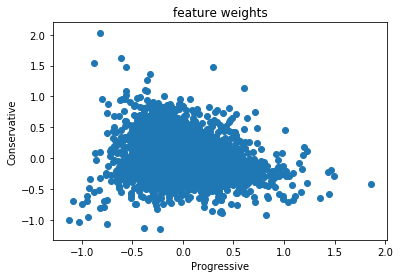

In [55]:
plt.scatter(lr.coef_[3],lr.coef_[1])
plt.xlabel(lr.classes_[3])
plt.ylabel(lr.classes_[1])
plt.title('feature weights');

Logistic regression employs a regularization penalty to control the norm of the weights. 

- In $\ell_2$ regularization, the penalty is on the Euclidean norm, also called the $\ell_2$ norm,
$R(\theta) = \lambda \sum_i \theta_i^2$

- In $\ell_1$ regularization, the penalty is on the $\ell_1$ norm,
$R(\theta) = \lambda \sum_i | \theta_i |$

Let's try it.


In [56]:
lr_l1 = LogisticRegression(penalty='l1')

In [57]:
lr_l1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

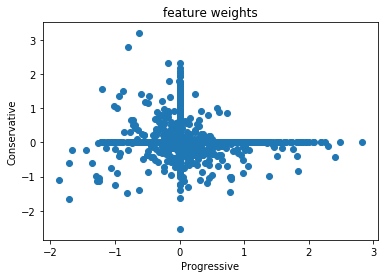

In [58]:
plt.scatter(lr_l1.coef_[3],lr_l1.coef_[1])
plt.xlabel(lr_l1.classes_[3])
plt.ylabel(lr_l1.classes_[1])
plt.title('feature weights');
#QUESTION: I'm not sure what I'm looking at. what is regularization? I don't understand 
#the discussion that follows. 

**Discuss** Try to explain what you see in this figure, and why $\ell_1$ regularization might make it possible to add $n$-gram features.

In [59]:
print('L1',[vect.get_feature_names()[i] for i in lr_l1.coef_[0].argsort()[::-1][:5]])
print('L2',[vect.get_feature_names()[i] for i in lr.coef_[0].argsort()[::-1][:5]])

L1 ['anarchist', 'anarchists', 'anarchism', 'protestors', 'ancap']
L2 ['anarchist', 'anarchism', 'anarchists', 'feminist', 'pigs']


No big difference in the word lists, but things might be different if we change the regularization parameters $C = \frac{1}{\lambda}$.

## Predictive accuracy

Using the classifier to make predictions is easy.

In [60]:
y_hat = lr.predict(X_test)

In [96]:
y_hat[:5]

array(['Libertarian', 'Socialism', 'Libertarian', 'Progressive',
       'Anarchism'], 
      dtype='<U12')

In [62]:
acc = (y_hat == y_test).mean()
print('accuracy: %.3f'%acc)

accuracy: 0.423


**Your turn**: compute the number of true positives, false negatives, and false positives for the `Socialism` label

In [63]:
import numpy as np

In [69]:
len(y_hat)

430

In [70]:
len(y_test)

430

In [104]:
label = 'Socialism'
# your code here

In [109]:
yh=np.array(y_hat)
yt=np.array(y_test)

In [114]:
#why doesn't this work? sum(np.logical_and(y_hat == label, y_test == label))
#this works:
sum(np.logical_and(yh == label, yt == label))
#QUESTION: is this because y_test is an array already? (see code above) And when you use 
#yt=np.array(y_test), then numpy is allowing us to work with arrays using true/false
#conditions?

47

In [111]:
tp = sum((yt==label) & (yh==label))
print(tp)

47


In [112]:
fp = sum((yt!=label) & (yh==label))
print(fp)

45


In [113]:
fn = sum((yt==label) & (yh!=label))
print(fn)
#QUESTION: WHAT IS F1 FOR? Why do we care about the true or false positives and negatives?

53


In [43]:
print(tp,fp,fn)

47 45 53


In [127]:
prec = tp/(tp+fp)
print('precision: %.3f'%(prec))

precision: 0.511


In [129]:
totpos =  sum(yt==label)
print(totpos)

100


In [131]:
rec = tp/totpos
print('recall: %.3f'%(rec))
#my spam filter is overactive. So it has high recall, but low precision (because it gives too 
#many false positives). 

recall: 0.470


In [132]:
f1 = 2 * prec * rec / (prec + rec)
print('f1: %.3f'%(f1))
#how come I get a different F1 score? I'm computing this only for socialism. 

f1: 0.490


`sklearn` has some useful functions here as well

In [115]:
from sklearn.metrics import accuracy_score, f1_score

In [116]:
accuracy_score(y_test,y_hat)

0.42325581395348838

Recall that $f_1$ is the geometric mean of recall and precision.

*Macro*-averaging means average across labels.

In this case, we have roughly the same number of documents per label, so macro and micro should be roughly the same.

In [117]:
f1_score(y_test,y_hat,average='macro')
#Macro looks at the f1 for all my labels, and averages them all together. 
#do this when you care about the rare cases. even if the label only appears a small 
#fraction of the time, we want to get it right. 

0.4134410346651185

In [118]:
f1_score(y_test,y_hat,average='micro')
#QUESTION: On an instance level, if I care about being right then I want to look at micro.
#on the average observation. 
#compute tp, fp, fn, and sum them up for all the labels. Then compute the grand f1.
#
# so for this problem, when all the labels appear about the same number of times, the 
#micro and macro are about the same. 

0.42325581395348838

# Improving the classifier

**Your turn** Try improving the classifier by:

- Not lowercasing the input
- Only including words that appear in at least two documents

In [144]:
vect3 = CountVectorizer(min_df=2, lowercase=False) # your code here

In [145]:
X = vect3.fit_transform(doc_list)

In [146]:
X.shape

(4291, 9309)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)

**Your turn** Run logistic regression, compute accuracy and $F_1$

In [148]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
y_hat = lr.predict(X_test)

In [150]:
accuracy_score(y_test,y_hat)

0.43488372093023253

In [151]:
print(f1_score(y_test,y_hat,average='macro'),f1_score(y_test,y_hat,average='micro'))
#QUESTION: I'm not sure what the macro and micro here means...

0.41920845591 0.43488372093


# Support vector machines

Support vector machines (SVMs) are another classifier. This code shows you how to try it.

In [138]:
from sklearn.svm import LinearSVC

In [139]:
svc = LinearSVC(C=0.01) 

In [140]:
svc.fit(X_train,y_train)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [141]:
y_hat = svc.predict(X_test)

In [142]:
accuracy_score(y_test,y_hat)

0.4511627906976744

In [143]:
print(f1_score(y_test,y_hat,average='macro'),f1_score(y_test,y_hat,average='micro'))

0.429545466194 0.451162790698


In [ ]:
#QUESTION: ok, so I think what we're doing here is that we're looking at the words (features)
#in a bunch of documents. And we're going to see if those words help us sort the documents
#according to their prespecified labels. But to do that, we need to tell the computer how 
#to read the words. And CountVectorizer has simple ways to do that by telling it
#to only use words that appear a certain number of times, or lowercase all the words,
#or not to lowercase them... etc. 